In [43]:
from skimage.io import imread, imsave
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [52]:
video = imread('cells_original.tif')

# Drift the video
driftx = drifty = 0.0
for i in tqdm(range(0, video.shape[0])):
    driftx += np.random.random()*0.05
    drifty += np.random.random()*0.05

    video[i, :, :] = np.roll(video[i, :, :], round(driftx), axis=1)
    video[i, :, :] = np.roll(video[i, :, :], round(drifty), axis=0)

imsave('cells_drifting.tif', video)

100%|██████████| 1901/1901 [00:00<00:00, 8630.58it/s]
/lab/Teaching/BIA4/BIA4/bia4_env/lib64/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: cells_drifting.tif is a low contrast image
  if sys.path[0] == '':


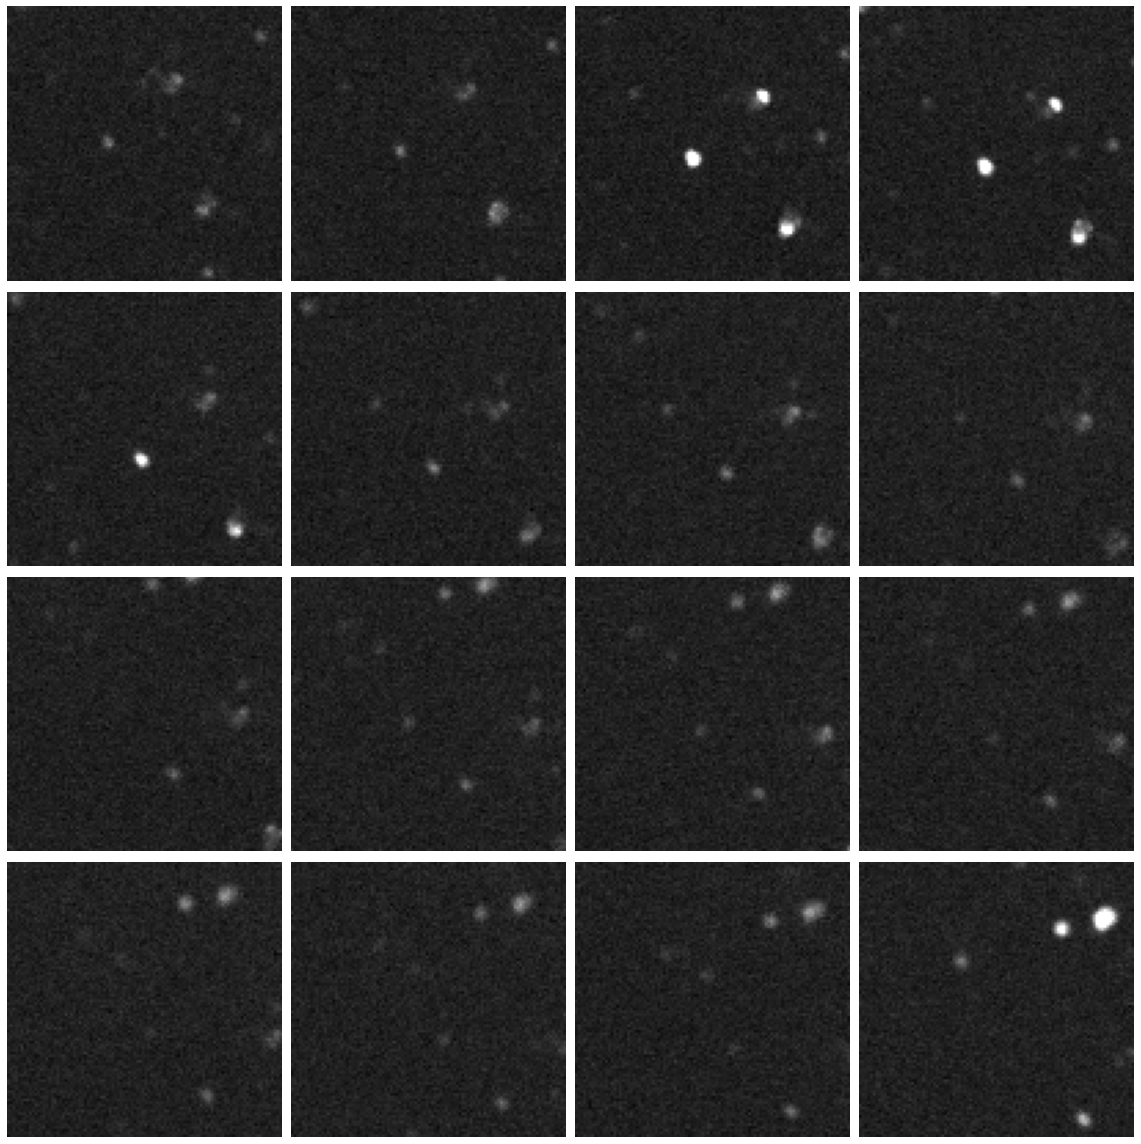

In [48]:
video = imread('cells_drifting.tif')
video = img_as_ubyte(video)

fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for i, frame in enumerate(range(0, video.shape[0], 120)):
    ax[i//4, i%4].imshow(video[frame, 100:200, 100:200], cmap='gray', vmin=0, vmax=255)
    ax[i//4, i%4].axis('off')

plt.tight_layout()

In [53]:
from skimage.registration import phase_cross_correlation
from skimage.transform import SimilarityTransform, warp

for f in tqdm(range(1, video.shape[0])):
    image = video[f]
    template = video[f-i]

    shift, _, _ = phase_cross_correlation(image, template)
    tform = SimilarityTransform(translation=shift)
    video[f] = warp(video[f], tform) 

imsave('cells_drifting_corrected.tif', video)

100%|██████████| 1900/1900 [00:19<00:00, 95.94it/s]
/lab/Teaching/BIA4/BIA4/bia4_env/lib64/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: cells_drifting_corrected.tif is a low contrast image
  if sys.path[0] == '':
